In [1]:
import time, os
import numpy as np
import pandas as pd
from pose_model import LSTM_model
from get_dataset_new import IMU_dataset
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


(18073, 20, 6) (18073,) (5,)


In [2]:
#PARAMETER
created_time = int(time.time())

epochs = 50
frame_len = 20
batch_size = 64
lr = 0.0001
loss = 'categorical_crossentropy'
dataset_dir = './22_dataset'

In [3]:
#LOAD DATASET
data = IMU_dataset(dataset_dir)
pose_list = os.listdir('./' + dataset_dir)

x_data, y_data, y_list = data.Sequence_data(frame_len)

print(x_data)
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)
y_data = to_categorical(y_data, len(pose_list))
print(np.shape(x_data))

X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, random_state = 2022)


print(np.shape(x_data), np.shape(y_data))

[[[ 0.98827652  1.         -0.87196395  0.88332544 -1.
    1.        ]
  [ 0.98818361  0.99997744 -0.87470799  0.88612835 -0.99997507
    0.98900174]
  [ 0.98836593  0.99878048 -0.88082286  0.89203047 -0.99865544
    0.97811333]
  ...
  [ 0.99656191  0.96038057 -0.99691766  0.9985394  -0.95659305
    0.84224892]
  [ 0.99814294  0.95508699 -1.          1.         -0.95083489
    0.83332048]
  [ 1.          0.94947341 -0.9985871   0.99681964 -0.94473873
    0.82420652]]

 [[ 0.98620283  1.         -0.87470799  0.88612835 -1.
    1.        ]
  [ 0.98638479  0.99880301 -0.88082286  0.89203047 -0.99868034
    0.98899051]
  [ 0.98677909  0.99661634 -0.89017713  0.90094642 -0.99627104
    0.97746286]
  ...
  [ 0.9961422   0.95510854 -1.          1.         -0.95085859
    0.84258748]
  [ 0.99799554  0.94949483 -0.9985871   0.99681964 -0.94476228
    0.83337216]
  [ 1.          0.9437765  -0.99396044  0.99038621 -0.93856319
    0.82455521]]

 [[ 0.98437731  1.         -0.88082286  0.89203047 -

In [4]:
print(y_list)

['running.csv', 'Sitting_on_chair.csv', 'Sit_to_stand.csv', 'standing.csv', 'walking.csv']


In [5]:
num_degree = np.shape(x_data)[-1]
num_pose = len(os.listdir('./'+dataset_dir))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 seq_input (InputLayer)         [(None, 20, 6)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 20, 64)       18176       ['seq_input[0][0]']              
                                                                                                  
 permute (Permute)              (None, 64, 20)       0           ['lstm[0][0]']                   
                                                                                                  
 dense (Dense)                  (None, 64, 20)       420         ['permute[0][0]']                
                                                                                              

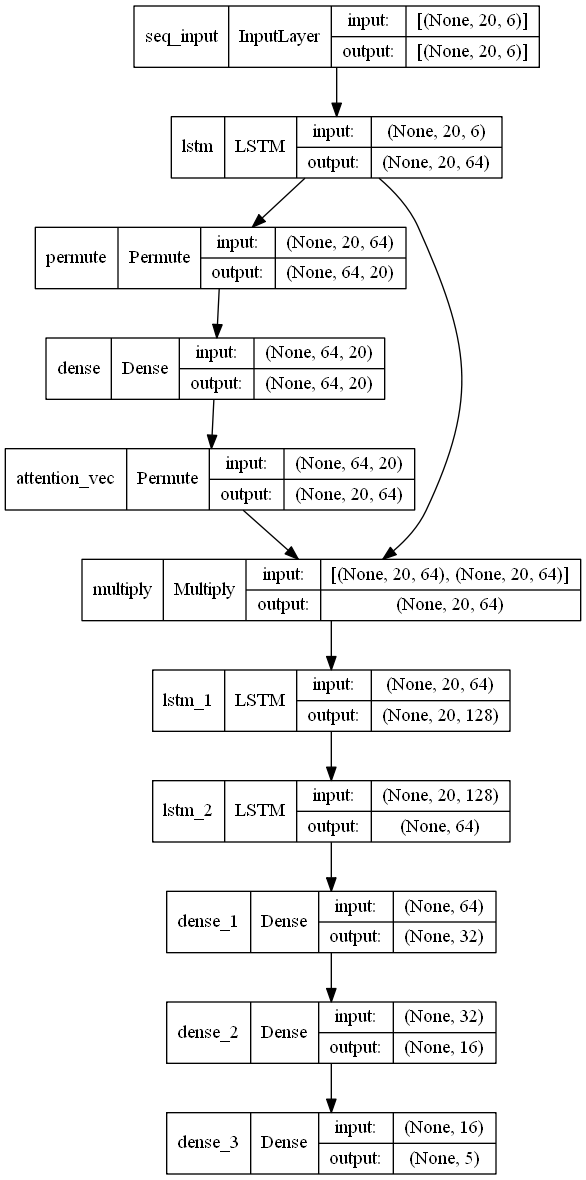

In [6]:
model = LSTM_model(num_degree, num_pose)
model.summary()
plot_model(model, show_shapes=True)

In [7]:
#MODEL COMPILE
model.compile(
    optimizer=Adam(learning_rate=lr),
    loss=loss,
    metrics=['acc'])

In [8]:
#EARLY STOPPING
cb = EarlyStopping(
    monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, mode='min',
    baseline=None, restore_best_weights=True
)

In [9]:
x_train, x_val, y_train, y_val, = train_test_split(x_data, y_data, test_size=0.2, random_state=2022)

In [10]:
#TRAIN
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val),
    callbacks=[cb]
)

Epoch 1/50
226/226 [==============================] - 28s 107ms/step - loss: 1.2369 - acc: 0.5498 - val_loss: 0.6082 - val_acc: 0.7845
Epoch 2/50
226/226 [==============================] - 22s 98ms/step - loss: 0.5867 - acc: 0.7969 - val_loss: 0.5206 - val_acc: 0.8108
Epoch 3/50
226/226 [==============================] - 21s 92ms/step - loss: 0.5257 - acc: 0.8080 - val_loss: 0.4668 - val_acc: 0.8470
Epoch 4/50
226/226 [==============================] - 21s 95ms/step - loss: 0.4982 - acc: 0.8153 - val_loss: 0.4356 - val_acc: 0.8501
Epoch 5/50
226/226 [==============================] - 24s 108ms/step - loss: 0.4766 - acc: 0.8222 - val_loss: 0.4286 - val_acc: 0.8437
Epoch 6/50
226/226 [==============================] - 22s 98ms/step - loss: 0.4589 - acc: 0.8261 - val_loss: 0.4011 - val_acc: 0.8459
Epoch 7/50
226/226 [==============================] - 24s 107ms/step - loss: 0.4504 - acc: 0.8320 - val_loss: 0.4051 - val_acc: 0.8509
Epoch 8/50
226/226 [==============================] - 23s 1

In [11]:
os.mkdir(f"models/{created_time}_{loss}_{lr}_{batch_size}")
model.save(f'models/{created_time}_{loss}_{lr}_{batch_size}/exercise_model.h5')

c:\Users\wooyong\anaconda3\envs\kwix\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


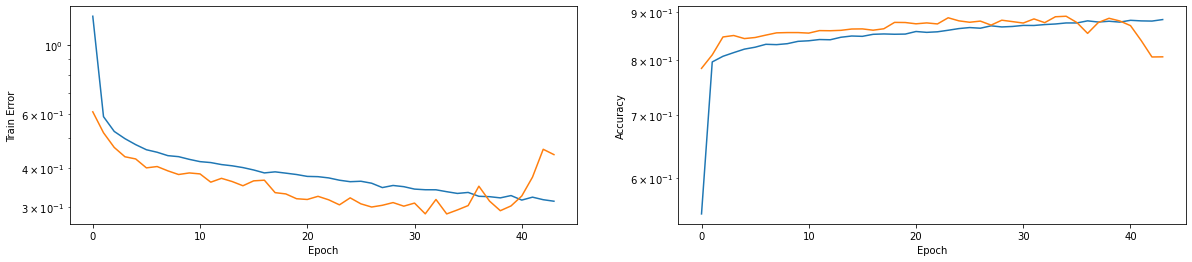

In [12]:
from tensorflow.keras.models import load_model
model_list= os.listdir('./models')
model = load_model(f'models/{model_list[-1]}/exercise_model.h5')


#PLT
plt.figure(figsize=(20,4), facecolor='white')
plt.subplot(1,2,1)
pd.Series(history.history['loss']).plot(logy=True)
pd.Series(history.history['val_loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

plt.subplot(1,2,2)
pd.Series(history.history['acc']).plot(logy=True)
pd.Series(history.history['val_acc']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.savefig(f"models/{created_time}_{loss}_{lr}_{batch_size}/train_error.png")
plt.show()

In [13]:
print(y_val)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]


In [14]:
label_pre = model.predict([x_val])
label_pre = np.argmax(label_pre,axis = 1)
y_val = np.argmax(y_val, axis = 1)

[3 2 3 ... 4 3 2]


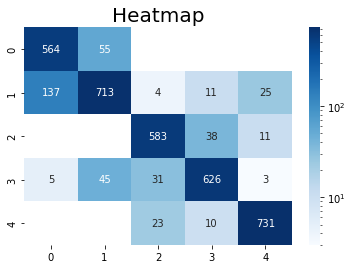

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix



# #Create confusion matrix and normalizes it over predicted (columns)
# label = np.argmax(label_val, axis = 1)


# result = confusion_matrix(y_val, label_pre)
# print(result)

print(label_pre)


result = confusion_matrix(label_pre, y_val)

import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
plt.figure(facecolor='white')
ax = sns.heatmap(result, annot=True,fmt='d',cmap='Blues',norm=LogNorm())
plt.title('Heatmap', fontsize=20)
plt.savefig(f"models/{model_list[-1]}/heatmap.png")
plt.show()

In [16]:
import tensorflowjs as tfjs
import os

tfjs.converters.save_keras_model(model, f"models/{model_list[-1]}/models_js")


c:\Users\wooyong\anaconda3\envs\kwix\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
